In [117]:
import numpy as np
import math as m
import random as r
import cvxpy as cp
from scipy.integrate import odeint
import seaborn as sns
import KuramotoFunctionBank as KFB
import importlib
importlib.reload(KFB)

<module 'KuramotoFunctionBank' from '/Users/Moncho/Desktop/Year 1/kuramotocontrol/KuramotoFunctionBank.py'>

In [39]:
#Parameter control center
N=7

#These are phases differences w.r.t osc 1
x_min = np.array([0, m.pi/8, m.pi/8, m.pi/6, m.pi/6, m.pi/3, 2*m.pi/3])

#Random adjacency matrix
A = np.zeros((N,N))
for i in range(0,N-1):
    for j in range(i+1,N):
        u=r.uniform(0,1)
        if u >0.1:
            A[i][j]=2
A = A + np.transpose(A)

#Random natural frequencies
w = 2*np.random.rand(N,1)
w = w-np.mean(w)


In [109]:
#Calculate quantities from inital parameters 

edges = KFB.CalculateEdgeSet(A)
x_desired = KFB.CalculatePhaseDifferencesFromMin(x_min,edges)
D = KFB.CalculateSinMatrix(edges,x_desired)
B = KFB.CalculateIncidenceMatrix(edges,N)
B_D = np.matmul(B,D)
delta1 = KFB.CalculateDeltaFromAdj(A,edges)

In [114]:
# Construct the problem and solve the convex optimisation problem
delta = cp.Variable((len(edges),1))
beta = cp.Variable((N,1))
objective = cp.Minimize(cp.sum_squares(delta-delta1)+ cp.sum_squares(beta))
constraints = [B_D@delta==w+beta,delta >=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

In [118]:
#Reobtain adjacency from delta vector
A = KFB.CalculateAdjFromDelta(delta.value,edges,N)

In [120]:
#Solving the model with these params
theta_0 = np.zeros(N)
T=10
num_points = 100

sol,t = KFB.SolveKuramotoModel(theta_0,T,N,w,A,num_points)

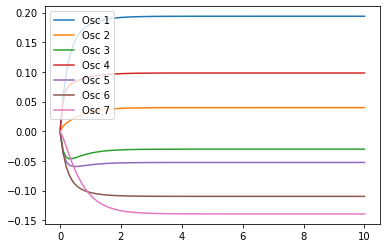

In [125]:
#Plot oscillator trajcetories
for i in range(0,N):
    ax = sns.lineplot(x=t,y=sol[:,i],label =str("Osc " + str(i+1)))


In [126]:
KFB.CalculatePhaseDiffs(sol[N-1,:])

[-0.13700617623887193,
 -0.06838838913972446,
 0.12873033016447472,
 -0.1450258047262432,
 -0.03533715080635934,
 0.016716429325284277]

In [128]:
x_min

array([0.        , 0.39269908, 0.39269908, 0.52359878, 0.52359878,
       1.04719755, 2.0943951 ])